# Calidad del Sueño

## 1. Definición del Problema de Machine Learning

El objetivo del siguiente trabajo es predecir la calidad de sueño de una persona basándonos en distintos factores.  
El target (calidad de sueño) consiste en un conjunto de valores discretos multiclase (marcados con valores que van del 1 al 5).  
Las métricas principales de clasificación son: F1-score, precisión, recall o accuracy.  
La métrica secundaria es la matriz de confusión para ver qué clases se confunden más.

**Impacto del proyecto**  
- Si el modelo predice una mala calidad del sueño, el sector hospitalario podrá establecer medidas personalizadas acorde a los problemas de las personas.  
- Tener un sueño reparador podría:  
  1. Mejorar la satisfacción personal y laboral del usuario, reduciendo problemas de salud relacionados con el sueño y mejorando la productividad en su día a día  
  2. Evitar accidentes de tráfico, lo que puede ayudar a salvar vidas

Los **requisitos mínimos** de rendimiento serán:
- El modelo debe alcanzar al menos un 80% de precisión en la exactitud de los datos (si es de 90% o más sería muy bueno) siempre y cuando las clases estén balanceadas  
- Los valores de F1-score deben tener un mínimo de 0.60 para ser aceptables, si tiene 0.70 serán buenos y si son mayores a 0.80 será excelente  
- La matriz de confusión será buena si no comete errores graves en las clases importantes  

| Variable | Rol | Tipo	| Descripción |	Unidades | Missing |
|---|---|---|---|---|---|
| Gender | Feature | Categorical | Gender | M / F | No |
| Age | Feature | Integer | 18-45 | Years | No |
| Sleep duration | Feature | Float | Time Slept | Hours | No |
| Sleep quality | Target | Integer | Quality | 1-5 | No |
| Stress level | Feature | Integer | Level | 1-5 | No |
| Blood pressure | Feature | Categorical | Systolic and Diastolic | Pressure | No |
| Heart rate | Feature | Integer | Pulse | Beats/min | No |
| Daily steps | Feature | Integer | 1000 units/day | Steps | No |
| Physical activity | Feature | Integer | Time/day | Minutes | No |
| Height | Feature | Integer | Height of Subject | cm | No |
| Weight | Feature | Integer | Weight of Subject | kg | No |
| Sleep disorder | Feature | Categorical | Known Sleep Disorder | Y / N | No |
| Wake up during night | Feature | Categorical | Wakes during night | Y / N | No |
| Feel sleepy during day | Feature | Categorical | Drowsiness | Y / N | No |
| Caffeine consumption | Feature | Categorical | Caffeine Consumption | Y / N | No |
| Alcohol consumption | Feature | Categorical | Alcohol Consumption | Y / N | No |
| Smoking | Feature | Categorical | Smoking habits | Y / N | No |
| Medical issue | Feature | Categorical | Medical Issue | Y / N | No |
| Ongoing medication | Feature | Categorical | Medical Prescription | Y / N | No |
| Smart device before bed | Feature | Categorical | Recent Activity | Y / N | No |
| Average screen time | Feature | Float | Screen Time | Time/day | No |
| Blue-light filter | Feature | Categorical | Eye Protection | Y / N | No |
| Discomfort Eye-strain | Feature | Categorical | Eye Strain | Y / N | No |
| Redness in eye | Feature | Categorical | Eye Redness | Y / N | No |
| Itchiness/Irritation in eye | Feature | Categorical | Eye Itchiness | Y / N | No |
| Dry Eye Disease | Feature | Categorical | Dry Eye | Y / N | No |

## 2. Recolección y Exploración de Datos

### Librerías y Formato

In [1]:
#Tratamiento de Datos
import pandas as pd
import numpy as np

#Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import shap
import lime
from lime import lime_tabular
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

import warnings
warnings.filterwarnings("ignore")

### Carga de Datos

In [2]:
sleep=pd.read_csv('../data/raw/Sleep.csv')

1. Obtener el dataset completo
2. Realizar análisis exploratorio inicial:
   - Dimensiones del dataset
   - Tipos de datos
   - Estadísticas descriptivas básicas
   - Distribución de variables
   - Correlaciones
3. Verificar la calidad de los datos:
   - Identificar valores faltantes
   - Detectar inconsistencias
   - Verificar el balance de clases (para clasificación)
   - Identificar posibles errores en los datos

In [3]:
df=sleep.copy()

In [4]:
pd.set_option("display.max_columns", None)
df.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,Weight,Sleep disorder,Wake up during night,Feel sleepy during day,Caffeine consumption,Alcohol consumption,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,69,Y,N,N,N,N,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,108/64,60,12000,74,164,87,N,N,N,N,Y,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,134/81,95,12000,93,179,94,Y,Y,N,Y,Y,N,N,N,Y,4.0,N,Y,N,N,N
3,F,45,5.4,4,5,110/90,78,19000,32,160,77,N,N,N,Y,N,N,Y,N,N,7.6,N,Y,N,Y,N
4,F,42,5.7,3,2,99/67,72,4000,173,179,99,N,Y,N,N,N,N,Y,N,N,3.5,N,Y,Y,N,Y


### Primera Observación

In [5]:
df.shape

(20000, 26)

In [6]:
df.info()
print("Filas:", df.shape[0])
print("Columnas:", df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  object 
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  object 
 12  Wake up during night         20000 non-null  object 
 13  Feel sleepy duri

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

Gender                         0
Age                            0
Sleep duration                 0
Sleep quality                  0
Stress level                   0
Blood pressure                 0
Heart rate                     0
Daily steps                    0
Physical activity              0
Height                         0
Weight                         0
Sleep disorder                 0
Wake up during night           0
Feel sleepy during day         0
Caffeine consumption           0
Alcohol consumption            0
Smoking                        0
Medical issue                  0
Ongoing medication             0
Smart device before bed        0
Average screen time            0
Blue-light filter              0
Discomfort Eye-strain          0
Redness in eye                 0
Itchiness/Irritation in eye    0
Dry Eye Disease                0
dtype: int64

### Valores únicos

In [9]:
summary_data = {
    "Category": [
        "Gender", "Sleep disorder", "Wake up during night", "Feel sleepy during day",
        "Caffeine consumption", "Alcohol consumption", "Smoking",
        "Medical issue", "Ongoing medication", "Smart device before bed", "Blue-light filter", 
        "Discomfort Eye-strain", "Redness in eye", "Itchiness/Irritation in eye", "Dry Eye Disease"
    ],
"Counts": [
        df['Gender'].value_counts().to_dict(),
        df['Sleep disorder'].value_counts().to_dict(),
        df['Wake up during night'].value_counts().to_dict(),
        df['Feel sleepy during day'].value_counts().to_dict(),
        df['Caffeine consumption'].value_counts().to_dict(),
        df['Alcohol consumption'].value_counts().to_dict(),
        df['Smoking'].value_counts().to_dict(),
        df['Medical issue'].value_counts().to_dict(),
        df['Ongoing medication'].value_counts().to_dict(),
        df['Smart device before bed'].value_counts().to_dict(),
        df['Blue-light filter'].value_counts().to_dict(),
        df['Discomfort Eye-strain'].value_counts().to_dict(),
        df['Redness in eye'].value_counts().to_dict(),
        df['Itchiness/Irritation in eye'].value_counts().to_dict(),
        df['Dry Eye Disease'].value_counts().to_dict()
    ]
}
summary_df = pd.DataFrame(summary_data)
summary_df

,Category,Counts
0,Gender,"{'M': 10028, 'F': 9972}"
1,Sleep disorder,"{'N': 10069, 'Y': 9931}"
2,Wake up during night,"{'N': 10000, 'Y': 10000}"
3,Feel sleepy during day,"{'N': 10178, 'Y': 9822}"
4,Caffeine consumption,"{'Y': 10089, 'N': 9911}"
5,Alcohol consumption,"{'Y': 10009, 'N': 9991}"
6,Smoking,"{'N': 10017, 'Y': 9983}"
7,Medical issue,"{'N': 10111, 'Y': 9889}"
8,Ongoing medication,"{'Y': 10082, 'N': 9918}"
9,Smart device before bed,"{'Y': 10003, 'N': 9997}"


Se observa que hay 20000 filas de información y 26 columnas. Lo que es un volumen adecuado para realizar un estudio de machine learning.  
La población se comprende de individuos entre 18 y 45 años, tanto hombres como mujeres que tienen características diferentes afectando su calidad de sueño.  
En la sección cualitativa hay una cantidad equilibrada de datos, tanto masculinos y femeninos así como afirmativa y negativa.

### Estadísticas descriptivas básicas

In [10]:
print(df.describe(include='object'))

       Gender Blood pressure Sleep disorder Wake up during night  \
count   20000          20000          20000                20000   
unique      2           1581              2                    2   
top         M         109/73              N                    N   
freq    10028             27          10069                10000   

       Feel sleepy during day Caffeine consumption Alcohol consumption  \
count                   20000                20000               20000   
unique                      2                    2                   2   
top                         N                    Y                   Y   
freq                    10178                10089               10009   

       Smoking Medical issue Ongoing medication Smart device before bed  \
count    20000         20000              20000                   20000   
unique       2             2                  2                       2   
top          N             N                  Y                

In [11]:
print(df.describe())

                Age  Sleep duration  Sleep quality  Stress level  \
count  20000.000000    20000.000000   20000.000000  20000.000000   
mean      31.422800        6.998245       2.997250      2.993750   
std        8.103717        1.731723       1.412283      1.407235   
min       18.000000        4.000000       1.000000      1.000000   
25%       24.000000        5.500000       2.000000      2.000000   
50%       31.000000        7.000000       3.000000      3.000000   
75%       39.000000        8.500000       4.000000      4.000000   
max       45.000000       10.000000       5.000000      5.000000   

         Heart rate   Daily steps  Physical activity        Height  \
count  20000.000000  20000.000000       20000.000000  20000.000000   
mean      79.912200  10536.900000          90.069750    174.865900   
std       11.808279   5752.729186          52.317283     14.719903   
min       60.000000   1000.000000           0.000000    150.000000   
25%       70.000000   6000.000000    

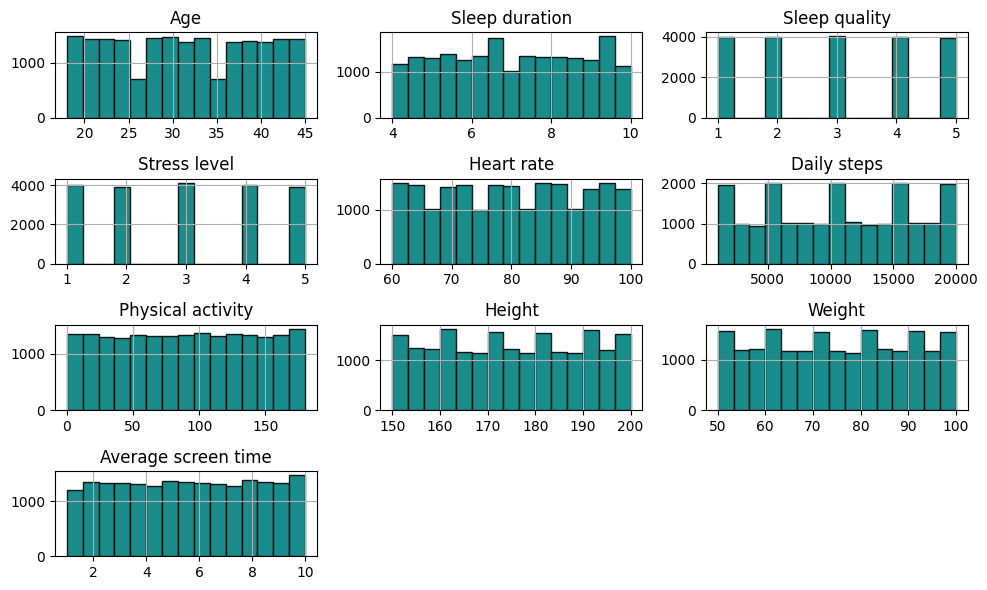

In [12]:
df.hist(figsize=(10, 6), bins=15, color='teal', alpha= 0.9, edgecolor='black')
plt.tight_layout()
plt.show()

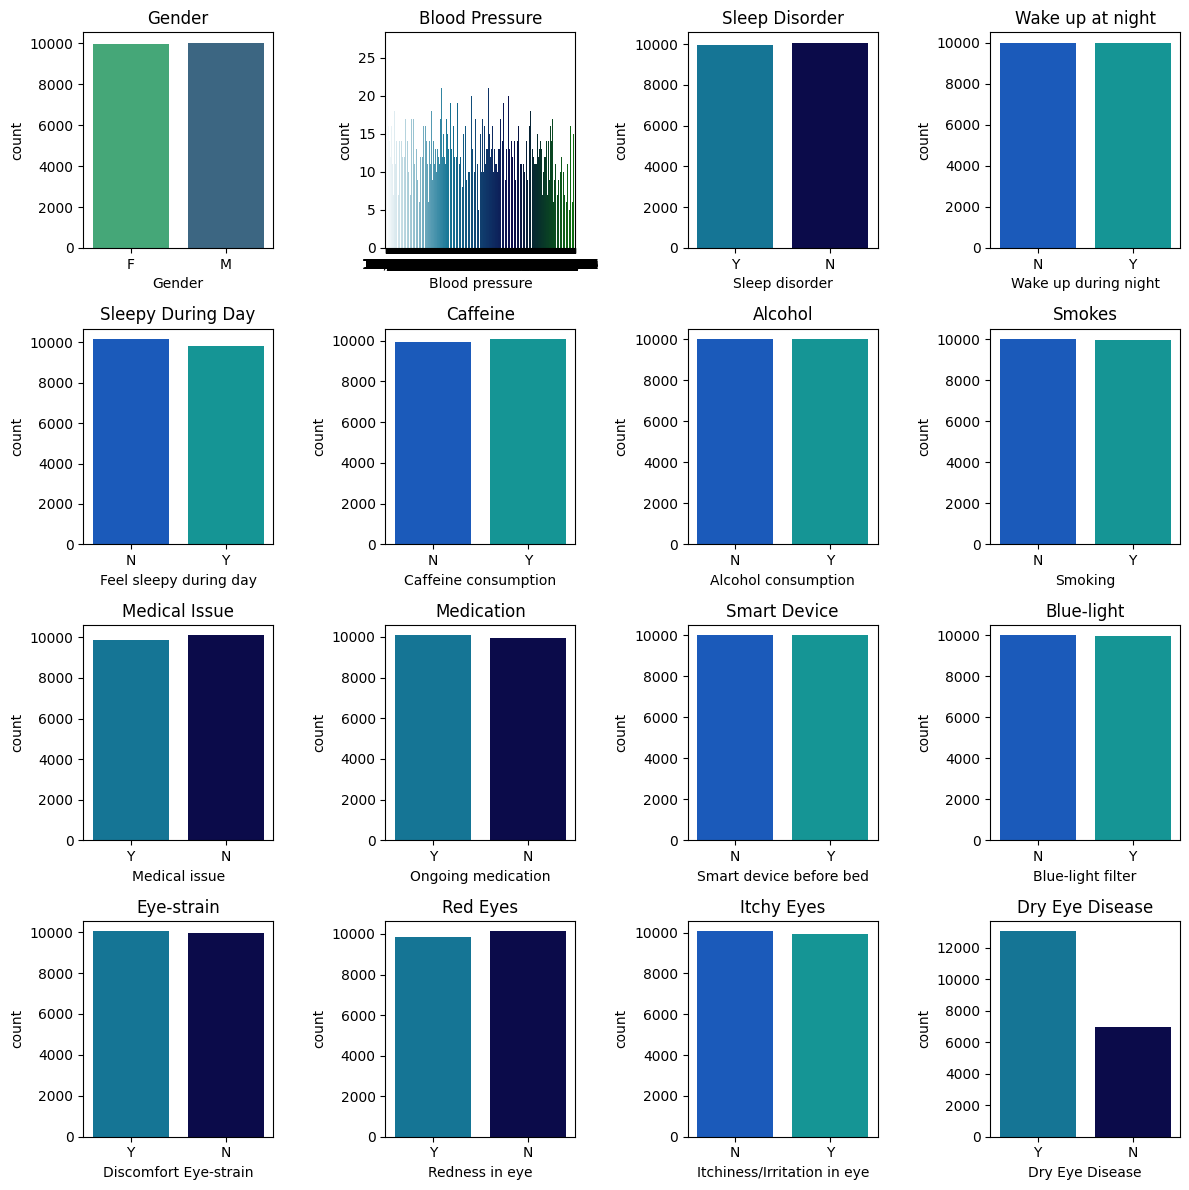

In [13]:
fig, axes = plt.subplots(4, 4, figsize=(12, 12), sharey=False)

sns.countplot(x=df['Gender'], palette='viridis_r', ax=axes[0,0])
axes[0,0].set_title('Gender')

sns.countplot(x=df['Blood pressure'], palette='ocean_r', ax=axes[0,1])
axes[0,1].set_title('Blood Pressure')

sns.countplot(x=df['Sleep disorder'], palette='ocean_r', ax=axes[0,2])
axes[0,2].set_title('Sleep Disorder')

sns.countplot(x=df['Wake up during night'], palette='winter', ax=axes[0,3])
axes[0,3].set_title('Wake up at night')

sns.countplot(x=df['Feel sleepy during day'], palette='winter', ax=axes[1,0])
axes[1,0].set_title('Sleepy During Day')

sns.countplot(x=df['Caffeine consumption'], palette='winter', ax=axes[1,1])
axes[1,1].set_title('Caffeine')

sns.countplot(x=df['Alcohol consumption'], palette='winter', ax=axes[1,2])
axes[1,2].set_title('Alcohol')

sns.countplot(x=df['Smoking'], palette='winter', ax=axes[1,3])
axes[1,3].set_title('Smokes')

sns.countplot(x=df['Medical issue'], palette='ocean_r', ax=axes[2,0])
axes[2,0].set_title('Medical Issue')

sns.countplot(x=df['Ongoing medication'], palette='ocean_r', ax=axes[2,1])
axes[2,1].set_title('Medication')

sns.countplot(x=df['Smart device before bed'], palette='winter', ax=axes[2,2])
axes[2,2].set_title('Smart Device')

sns.countplot(x=df['Blue-light filter'], palette='winter', ax=axes[2,3])
axes[2,3].set_title('Blue-light')

sns.countplot(x=df['Discomfort Eye-strain'], palette='ocean_r', ax=axes[3,0])
axes[3,0].set_title('Eye-strain')

sns.countplot(x=df['Redness in eye'], palette='ocean_r', ax=axes[3,1])
axes[3,1].set_title('Red Eyes')

sns.countplot(x=df['Itchiness/Irritation in eye'], palette='winter', ax=axes[3,2])
axes[3,2].set_title('Itchy Eyes')

sns.countplot(x=df['Dry Eye Disease'], palette='ocean_r', ax=axes[3,3])
axes[3,3].set_title('Dry Eye Disease')

plt.tight_layout()
plt.show() #TODO order Yes and No

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'Age'),
  Text(1.5, 0, 'Sleep duration'),
  Text(2.5, 0, 'Sleep quality'),
  Text(3.5, 0, 'Stress level'),
  Text(4.5, 0, 'Heart rate'),
  Text(5.5, 0, 'Daily steps'),
  Text(6.5, 0, 'Physical activity'),
  Text(7.5, 0, 'Height'),
  Text(8.5, 0, 'Weight'),
  Text(9.5, 0, 'Average screen time')])

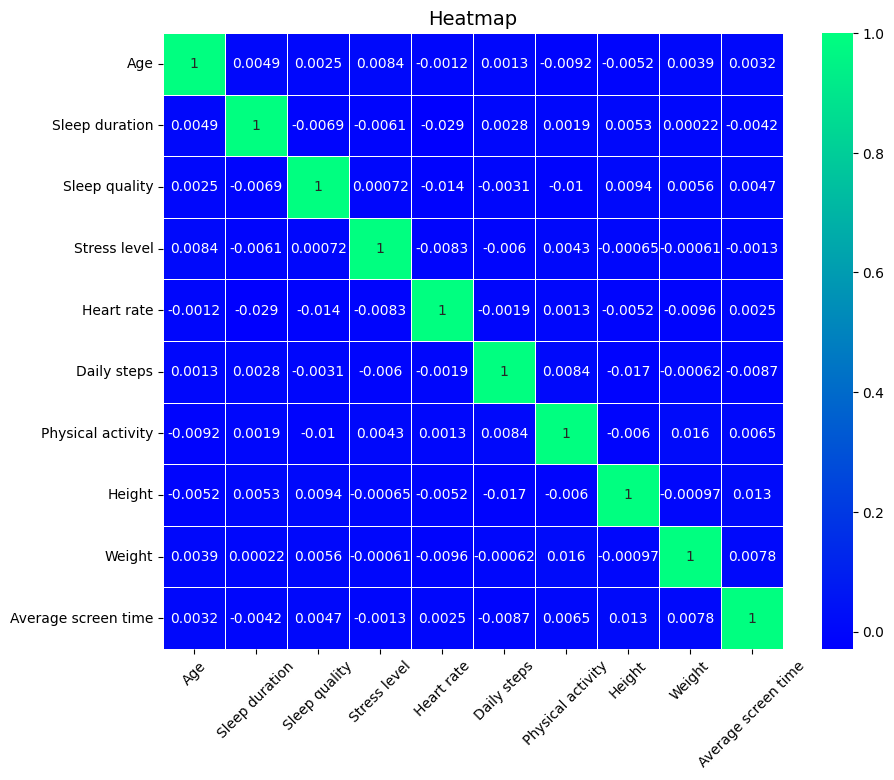

In [14]:
numeric_columns = df.select_dtypes(include=['number']).columns
matriz_correlacion = df[numeric_columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(matriz_correlacion, annot=True, cmap='winter', linewidths=0.5)
plt.title('Heatmap', fontsize=14)
plt.xticks(rotation=45)

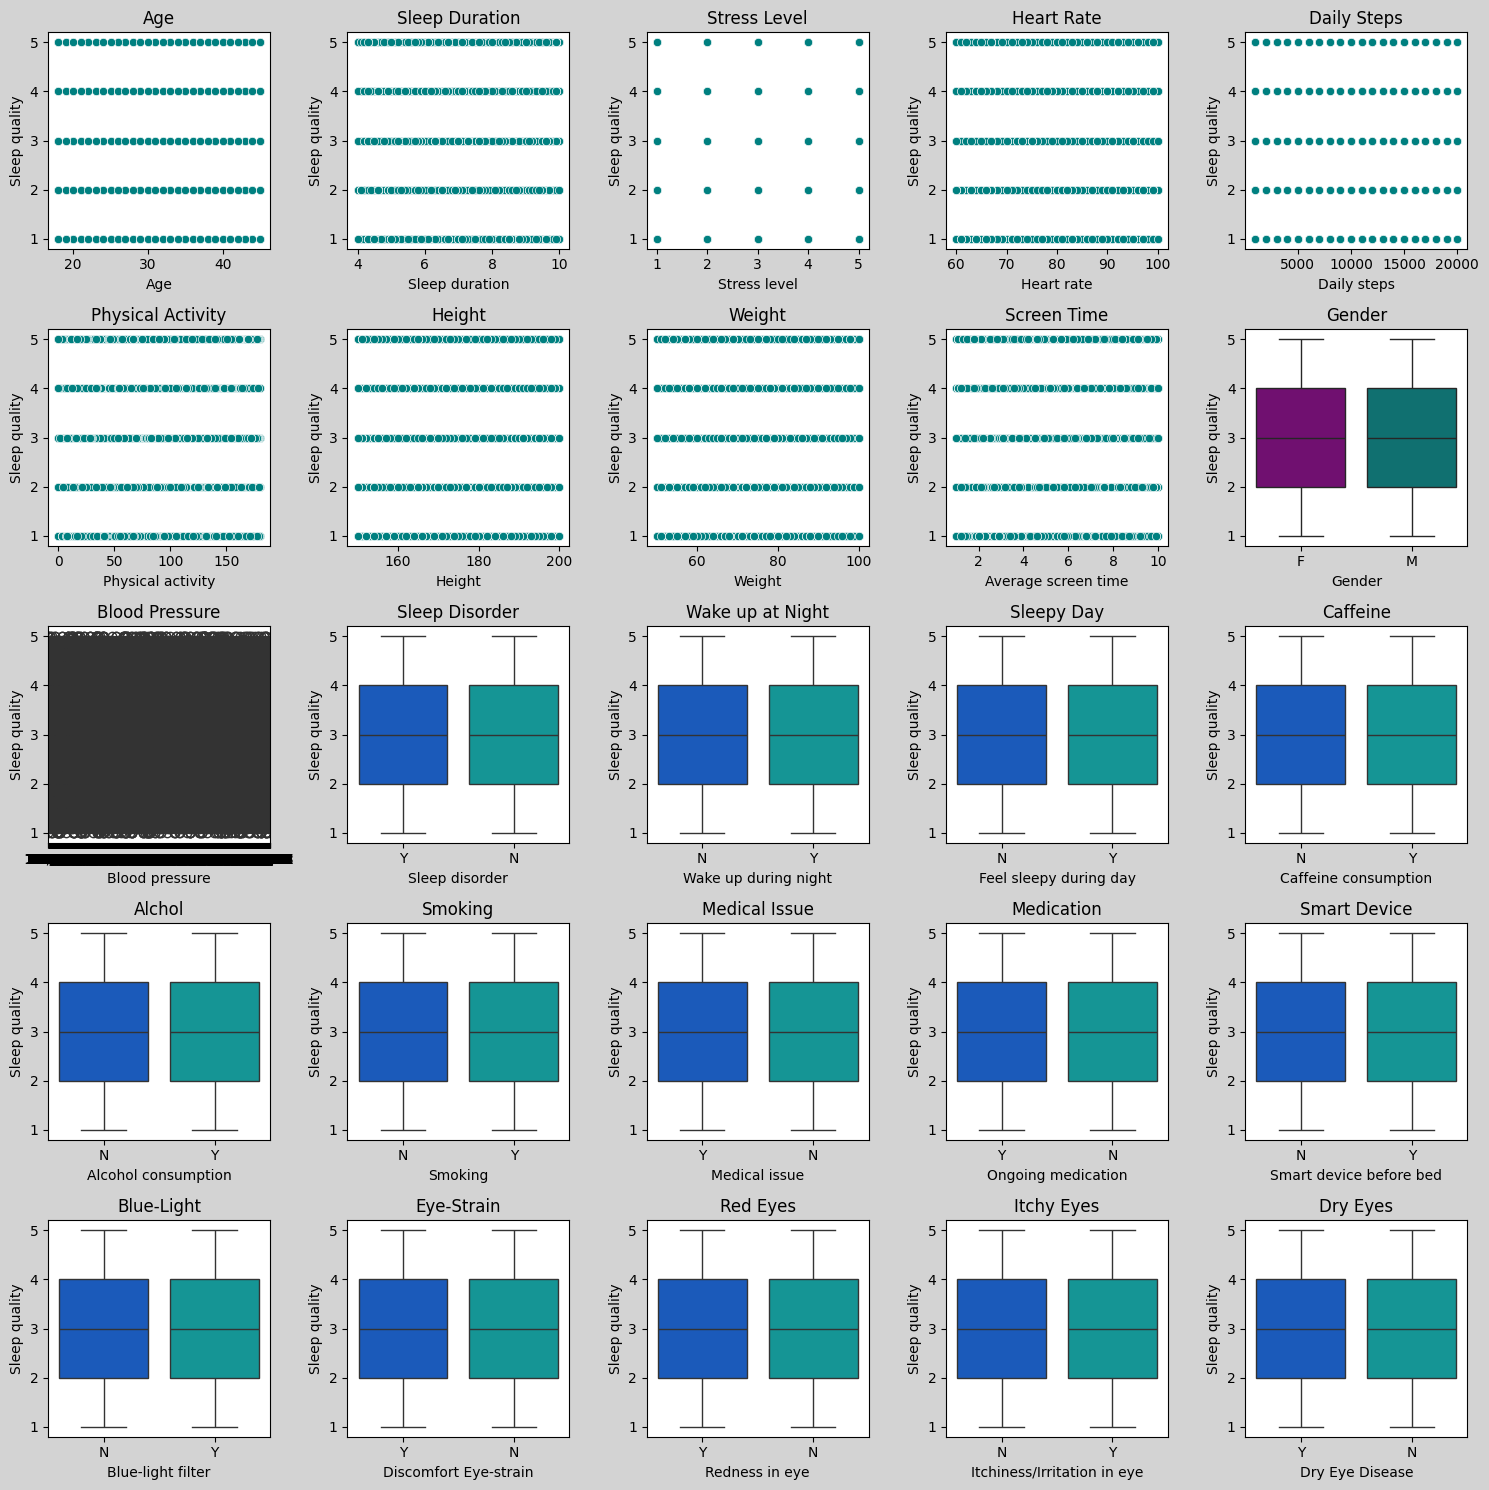

In [15]:
plt.figure(figsize=(15, 15), facecolor='lightgray')

plt.subplot(5,5,1)
sns.scatterplot(x='Age', y='Sleep quality', data=df, color='teal')
plt.title('Age')

plt.subplot(5,5,2)
sns.scatterplot(x='Sleep duration', y='Sleep quality', data=df, color='teal')
plt.title('Sleep Duration')

plt.subplot(5,5,3)
sns.scatterplot(x='Stress level', y='Sleep quality', data=df, color='teal')
plt.title('Stress Level')

plt.subplot(5,5,4)
sns.scatterplot(x='Heart rate', y='Sleep quality', data=df, color='teal')
plt.title('Heart Rate')

plt.subplot(5,5,5)
sns.scatterplot(x='Daily steps', y='Sleep quality', data=df, color='teal')
plt.title('Daily Steps')

plt.subplot(5,5,6)
sns.scatterplot(x='Physical activity', y='Sleep quality', data=df, color='teal')
plt.title('Physical Activity')

plt.subplot(5,5,7)
sns.scatterplot(x='Height', y='Sleep quality', data=df, color='teal')
plt.title('Height')

plt.subplot(5,5,8)
sns.scatterplot(x='Weight', y='Sleep quality', data=df, color='teal')
plt.title('Weight')

plt.subplot(5,5,9)
sns.scatterplot(x='Average screen time', y='Sleep quality', data=df, color='teal')
plt.title('Screen Time')

plt.subplot(5,5,10)
sns.boxplot(x='Gender', y='Sleep quality', data=df, palette={"M": "teal", "F": "purple"})
plt.title('Gender')

plt.subplot(5,5,11)
sns.boxplot(x='Blood pressure', y='Sleep quality', data=df, palette='winter')
plt.title('Blood Pressure')

plt.subplot(5,5,12)
sns.boxplot(x='Sleep disorder', y='Sleep quality', data=df, palette='winter')
plt.title('Sleep Disorder')

plt.subplot(5,5,13)
sns.boxplot(x='Wake up during night', y='Sleep quality', data=df, palette='winter')
plt.title('Wake up at Night')

plt.subplot(5,5,14)
sns.boxplot(x='Feel sleepy during day', y='Sleep quality', data=df, palette='winter')
plt.title('Sleepy Day')

plt.subplot(5,5,15)
sns.boxplot(x='Caffeine consumption', y='Sleep quality', data=df, palette='winter')
plt.title('Caffeine')

plt.subplot(5,5,16)
sns.boxplot(x='Alcohol consumption', y='Sleep quality', data=df, palette='winter')
plt.title('Alchol')

plt.subplot(5,5,17)
sns.boxplot(x='Smoking', y='Sleep quality', data=df, palette='winter')
plt.title('Smoking')

plt.subplot(5,5,18)
sns.boxplot(x='Medical issue', y='Sleep quality', data=df, palette='winter')
plt.title('Medical Issue')

plt.subplot(5,5,19)
sns.boxplot(x='Ongoing medication', y='Sleep quality', data=df, palette='winter')
plt.title('Medication')

plt.subplot(5,5,20)
sns.boxplot(x='Smart device before bed', y='Sleep quality', data=df, palette='winter')
plt.title('Smart Device')

plt.subplot(5,5,21)
sns.boxplot(x='Blue-light filter', y='Sleep quality', data=df, palette='winter')
plt.title('Blue-Light')

plt.subplot(5,5,22)
sns.boxplot(x='Discomfort Eye-strain', y='Sleep quality', data=df, palette='winter')
plt.title('Eye-Strain')

plt.subplot(5,5,23)
sns.boxplot(x='Redness in eye', y='Sleep quality', data=df, palette='winter')
plt.title('Red Eyes')

plt.subplot(5,5,24)
sns.boxplot(x='Itchiness/Irritation in eye', y='Sleep quality', data=df, palette='winter')
plt.title('Itchy Eyes')

plt.subplot(5,5,25)
sns.boxplot(x='Dry Eye Disease', y='Sleep quality', data=df, palette='winter')
plt.title('Dry Eyes')

plt.tight_layout()
plt.show()

## 3. Preprocesamiento de Datos Inicial

Se ha observado en la primera exploración de datos que no hay valores faltantes ni valores duplicados, sin embargo sí hay datos que son poco probables que afecten a la calidad del sueño como Discomfort Eye-strain (molestias fatiga visual), Redness in eye (ojos rojos), Itchiness/Irritation in eye (picor/irritación ocular), Dry Eye Disease (enfermedad del ojo seco)

## 4. Feature Engineering

1. Selección inicial de características:
   - Análisis de correlaciones
   - Importancia de variables
2. Creación de nuevas características:
   - Combinaciones de variables existentes
   - Transformaciones matemáticas
3. Aplicación de técnicas no supervisadas (si es necesario):
   - PCA para reducción de dimensionalidad
   - Clustering para nuevas features

In [16]:
pd.set_option("display.max_columns", None)
df

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,Weight,Sleep disorder,Wake up during night,Feel sleepy during day,Caffeine consumption,Alcohol consumption,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,69,Y,N,N,N,N,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,108/64,60,12000,74,164,87,N,N,N,N,Y,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,134/81,95,12000,93,179,94,Y,Y,N,Y,Y,N,N,N,Y,4.0,N,Y,N,N,N
3,F,45,5.4,4,5,110/90,78,19000,32,160,77,N,N,N,Y,N,N,Y,N,N,7.6,N,Y,N,Y,N
4,F,42,5.7,3,2,99/67,72,4000,173,179,99,N,Y,N,N,N,N,Y,N,N,3.5,N,Y,Y,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,M,26,9.4,2,3,132/64,91,20000,88,200,72,N,Y,Y,N,N,Y,Y,Y,Y,3.8,N,Y,N,Y,Y
19996,F,39,7.3,3,4,101/75,65,2000,53,195,96,Y,N,Y,N,Y,N,Y,Y,N,3.8,N,N,Y,N,Y
19997,F,20,8.0,5,3,124/63,78,10000,17,186,87,N,N,Y,Y,Y,Y,Y,N,N,8.4,N,N,Y,N,N
19998,M,38,4.5,3,3,136/70,60,3000,115,170,66,N,Y,N,Y,Y,Y,N,Y,N,2.2,N,N,N,Y,Y


### Gender

In [17]:
df=pd.get_dummies(df, columns=['Gender', 'Sleep disorder', 'Wake up during night', 'Feel sleepy during day', 'Caffeine consumption', 'Alcohol consumption', 'Smoking', 'Medical issue', 'Ongoing medication', 'Smart device before bed', 'Blue-light filter', 'Discomfort Eye-strain', 'Redness in eye', 'Itchiness/Irritation in eye', 'Dry Eye Disease'], drop_first=False, dtype=int)
df

,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,Weight,Average screen time,Gender_F,Gender_M,Sleep disorder_N,Sleep disorder_Y,Wake up during night_N,Wake up during night_Y,Feel sleepy during day_N,Feel sleepy during day_Y,Caffeine consumption_N,Caffeine consumption_Y,Alcohol consumption_N,Alcohol consumption_Y,Smoking_N,Smoking_Y,Medical issue_N,Medical issue_Y,Ongoing medication_N,Ongoing medication_Y,Smart device before bed_N,Smart device before bed_Y,Blue-light filter_N,Blue-light filter_Y,Discomfort Eye-strain_N,Discomfort Eye-strain_Y,Redness in eye_N,Redness in eye_Y,Itchiness/Irritation in eye_N,Itchiness/Irritation in eye_Y,Dry Eye Disease_N,Dry Eye Disease_Y
0,24,9.5,2,1,137/89,67,3000,31,161,69,8.7,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,1
1,39,9.6,2,3,108/64,60,12000,74,164,87,9.6,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,1
2,45,5.4,1,5,134/81,95,12000,93,179,94,4.0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
3,45,5.4,4,5,110/90,78,19000,32,160,77,7.6,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0
4,42,5.7,3,2,99/67,72,4000,173,179,99,3.5,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,26,9.4,2,3,132/64,91,20000,88,200,72,3.8,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,1
19996,39,7.3,3,4,101/75,65,2000,53,195,96,3.8,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1
19997,20,8.0,5,3,124/63,78,10000,17,186,87,8.4,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0
19998,38,4.5,3,3,136/70,60,3000,115,170,66,2.2,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1


### Sleep

#### Duration

American Academy of Sleep Medicine clasifica la duración del sueño en 4 grupos: privación del sueño (<=5h), sueño corto (5-7h), recomendado (7-9h) y largo (>9h)

|Classification|Sleep Duration (h)|Risk of Health Problems|Mapping|
|---|---|---|---|
|**Sleep Deprivation**|< 5|High|0|
|**Short Sleep**|5-7|Increased|1|
|**Recommended Sleep**|7-9|Least|2|
|**Long Sleep**|>=9|Increased|3|

In [18]:
def Sleep_Duration (h):
    if h >= 9:
        return "Long Sleep"
    elif h >= 7:
        return "Recommended Sleep"
    elif h >= 5:
        return "Short Sleep"
    else:
        return "Sleep Deprivation"

df["Sleep duration"] = df.apply(lambda row: Sleep_Duration(row["Sleep duration"]), axis=1)

In [19]:
sleep_duration_order = ['Sleep Deprivation', 'Short Sleep', 'Recommended Sleep', 'Long Sleep']
df['Sleep duration'] = pd.Categorical(df['Sleep duration'], categories=sleep_duration_order, ordered=True)
pd.crosstab(df['Sleep duration'], df['Sleep quality'], normalize=True, margins=True).mul(100).round(2)

Sleep quality,1,2,3,4,5,All
Sleep duration,,,,,,
Sleep Deprivation,3.06,3.18,3.01,3.22,3.16,15.62
Short Sleep,6.64,6.53,7.13,6.48,6.82,33.60
Recommended Sleep,6.83,6.69,6.38,6.85,6.22,32.98
Long Sleep,3.48,3.58,3.60,3.51,3.63,17.80
All,20.02,19.98,20.12,20.05,19.84,100.00


In [20]:
sleep_mapping = {
        "Sleep Deprivation": 0,
        "Short Sleep": 1,
        "Recommended Sleep": 2,
        "Long Sleep": 3
}

df['Sleep duration'] = df['Sleep duration'].map(sleep_mapping)

### Stress level

In [21]:
pd.crosstab(df['Stress level'], df['Sleep quality'], normalize=True, margins=True).mul(100).round(2)

Sleep quality,1,2,3,4,5,All
Stress level,,,,,,
1,3.80,4.14,4.14,4.04,3.93,20.06
2,3.88,4.02,3.90,3.86,4.00,19.65
3,4.36,4.10,4.12,4.05,4.03,20.66
4,4.03,4.10,3.96,4.06,3.99,20.14
5,3.94,3.62,4.00,4.04,3.90,19.50
All,20.02,19.98,20.12,20.05,19.84,100.00


### Blood Pressure

In [22]:
# División de presión sanguínea entre sistólica y diastólica

df[['systolic', 'diastolic']] = df['Blood pressure'].str.split('/', expand=True).astype(int)
df

,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,Weight,Average screen time,Gender_F,Gender_M,Sleep disorder_N,Sleep disorder_Y,Wake up during night_N,Wake up during night_Y,Feel sleepy during day_N,Feel sleepy during day_Y,Caffeine consumption_N,Caffeine consumption_Y,Alcohol consumption_N,Alcohol consumption_Y,Smoking_N,Smoking_Y,Medical issue_N,Medical issue_Y,Ongoing medication_N,Ongoing medication_Y,Smart device before bed_N,Smart device before bed_Y,Blue-light filter_N,Blue-light filter_Y,Discomfort Eye-strain_N,Discomfort Eye-strain_Y,Redness in eye_N,Redness in eye_Y,Itchiness/Irritation in eye_N,Itchiness/Irritation in eye_Y,Dry Eye Disease_N,Dry Eye Disease_Y,systolic,diastolic
0,24,3,2,1,137/89,67,3000,31,161,69,8.7,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,1,137,89
1,39,3,2,3,108/64,60,12000,74,164,87,9.6,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,1,108,64
2,45,1,1,5,134/81,95,12000,93,179,94,4.0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,134,81
3,45,1,4,5,110/90,78,19000,32,160,77,7.6,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,110,90
4,42,1,3,2,99/67,72,4000,173,179,99,3.5,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,1,99,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,26,3,2,3,132/64,91,20000,88,200,72,3.8,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,1,132,64
19996,39,2,3,4,101/75,65,2000,53,195,96,3.8,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,101,75
19997,20,2,5,3,124/63,78,10000,17,186,87,8.4,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,124,63
19998,38,0,3,3,136/70,60,3000,115,170,66,2.2,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,136,70


In [23]:
# Comprobación de valores máximos y mínimos presentes en el dataframe
print("syst_max:", df['systolic'].max())
print("syst_min:", df['systolic'].min())
print("dias_max:", df['diastolic'].max())
print("dias_min:", df['diastolic'].min())

syst_max: 140
syst_min: 90
dias_max: 90
dias_min: 60


|Classification|Systolic|and/or|Diastolic|Risk of Health Problems|Mapping|
|---|---|---|---|---|---|
|**Low**|<=90|and|<=60|Increased|0|
|**Normal**|120|and|80|Least|1|
|**Elevated**|120-129|and|<80|Increased|2|
|**Hypertension**|130-139|or|80-89|High|3|
|**Hypertension 2**|>=140|or|>=90|Very high|4|

In [24]:
def blood_pressure(systolic, diastolic):
    if systolic >= 140 or diastolic >= 90:
        return "Hypertension 2"
    elif systolic >= 130 or diastolic >= 80:
        return "Hypertension 1"
    elif systolic >= 120 and diastolic < 80:
        return "Elevated"
    elif systolic > 90 and diastolic > 60:
        return "Normal"
    else:
        return "Low"

df["Blood Pressure"] = df.apply(lambda row: blood_pressure(row["systolic"], row["diastolic"]), axis=1)

In [25]:
df

,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,Weight,Average screen time,Gender_F,Gender_M,Sleep disorder_N,Sleep disorder_Y,Wake up during night_N,Wake up during night_Y,Feel sleepy during day_N,Feel sleepy during day_Y,Caffeine consumption_N,Caffeine consumption_Y,Alcohol consumption_N,Alcohol consumption_Y,Smoking_N,Smoking_Y,Medical issue_N,Medical issue_Y,Ongoing medication_N,Ongoing medication_Y,Smart device before bed_N,Smart device before bed_Y,Blue-light filter_N,Blue-light filter_Y,Discomfort Eye-strain_N,Discomfort Eye-strain_Y,Redness in eye_N,Redness in eye_Y,Itchiness/Irritation in eye_N,Itchiness/Irritation in eye_Y,Dry Eye Disease_N,Dry Eye Disease_Y,systolic,diastolic,Blood Pressure
0,24,3,2,1,137/89,67,3000,31,161,69,8.7,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,1,137,89,Hypertension 1
1,39,3,2,3,108/64,60,12000,74,164,87,9.6,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,1,108,64,Normal
2,45,1,1,5,134/81,95,12000,93,179,94,4.0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,134,81,Hypertension 1
3,45,1,4,5,110/90,78,19000,32,160,77,7.6,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,110,90,Hypertension 2
4,42,1,3,2,99/67,72,4000,173,179,99,3.5,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,1,99,67,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,26,3,2,3,132/64,91,20000,88,200,72,3.8,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,1,132,64,Hypertension 1
19996,39,2,3,4,101/75,65,2000,53,195,96,3.8,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,101,75,Normal
19997,20,2,5,3,124/63,78,10000,17,186,87,8.4,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,124,63,Elevated
19998,38,0,3,3,136/70,60,3000,115,170,66,2.2,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,136,70,Hypertension 1


In [26]:
Blood_Pressure_order = ['Low', 'Normal', 'Elevated', 'Hypertension 1', 'Hypertension 2']
df['Blood Pressure'] = pd.Categorical(df['Blood Pressure'], categories=Blood_Pressure_order, ordered=True)
pd.crosstab(df['Blood Pressure'], df['Sleep quality'], normalize=True, margins=True).mul(100).round(2)

Sleep quality,1,2,3,4,5,All
Blood Pressure,,,,,,
Low,0.61,0.72,0.58,0.66,0.58,3.14
Normal,6.76,6.98,7.03,6.94,6.82,34.54
Elevated,2.50,2.57,2.64,2.62,2.54,12.87
Hypertension 1,9.04,8.70,8.82,8.71,8.88,44.16
Hypertension 2,1.11,1.00,1.04,1.12,1.03,5.29
All,20.02,19.98,20.12,20.05,19.84,100.00


In [27]:
BP_mapping = {
        "Low": 0,
        "Normal": 1,
        "Elevated": 2,
        "Hypertension 1": 3,
        "Hypertension 2": 4
}

df['Blood Pressure'] = df['Blood Pressure'].map(BP_mapping)

### BMI

|Classification|BMI (kg/m2)|Risk of Health Problems|Mapping|
|---|---|---|---|
|Underweight|< 18.5|Increased|0|
|Normal Weight|18.5 - 24.9|Least|1|
|Overweight|25.0 - 29.9|Increased|2|
|Obese class I|30.0 - 34.9|High|3|
|Obese class II|35.0 - 39.9|Very high|4|
|Obese class III|>= 40.0|Extremely high|5|

In [28]:
df['BMI'] = df['Weight']/(df['Height']**2)*10000
df['BMI']=df['BMI'].round(1)
print("BMI_max:", df['BMI'].max())
print("BMI_min:", df['BMI'].min())

BMI_max: 44.4
BMI_min: 12.5


In [29]:
def BMI_category (kg_m2):
    if kg_m2 >= 40.0:
        return "Obese class III"
    elif kg_m2 >= 35.0:
        return "Obese class II"
    elif kg_m2 >= 30.0:
        return "Obese class I"
    elif kg_m2 > 25.0:
        return "Overweight"
    elif kg_m2 > 18.5:
        return "Normal"
    else:
        return "Underweight"

df["BMI Category"] = df["BMI"].apply(BMI_category)
df

,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,Weight,Average screen time,Gender_F,Gender_M,Sleep disorder_N,Sleep disorder_Y,Wake up during night_N,Wake up during night_Y,Feel sleepy during day_N,Feel sleepy during day_Y,Caffeine consumption_N,Caffeine consumption_Y,Alcohol consumption_N,Alcohol consumption_Y,Smoking_N,Smoking_Y,Medical issue_N,Medical issue_Y,Ongoing medication_N,Ongoing medication_Y,Smart device before bed_N,Smart device before bed_Y,Blue-light filter_N,Blue-light filter_Y,Discomfort Eye-strain_N,Discomfort Eye-strain_Y,Redness in eye_N,Redness in eye_Y,Itchiness/Irritation in eye_N,Itchiness/Irritation in eye_Y,Dry Eye Disease_N,Dry Eye Disease_Y,systolic,diastolic,Blood Pressure,BMI,BMI Category
0,24,3,2,1,137/89,67,3000,31,161,69,8.7,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,1,137,89,3,26.6,Overweight
1,39,3,2,3,108/64,60,12000,74,164,87,9.6,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,1,108,64,1,32.3,Obese class I
2,45,1,1,5,134/81,95,12000,93,179,94,4.0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,134,81,3,29.3,Overweight
3,45,1,4,5,110/90,78,19000,32,160,77,7.6,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,110,90,4,30.1,Obese class I
4,42,1,3,2,99/67,72,4000,173,179,99,3.5,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,1,99,67,1,30.9,Obese class I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,26,3,2,3,132/64,91,20000,88,200,72,3.8,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,1,132,64,3,18.0,Underweight
19996,39,2,3,4,101/75,65,2000,53,195,96,3.8,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,101,75,1,25.2,Overweight
19997,20,2,5,3,124/63,78,10000,17,186,87,8.4,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,124,63,2,25.1,Overweight
19998,38,0,3,3,136/70,60,3000,115,170,66,2.2,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,136,70,3,22.8,Normal


In [30]:
BMI_Category_order = ['Underweight', 'Normal', 'Overweight', 'Obese class I', 'Obese class II', 'Obese class III']
df['BMI Category'] = pd.Categorical(df['BMI Category'], categories=BMI_Category_order, ordered=True)
pd.crosstab(df['BMI Category'], df['Sleep quality'], normalize=True, margins=True).mul(100).round(2)

Sleep quality,1,2,3,4,5,All
BMI Category,,,,,,
Underweight,3.60,3.40,3.46,3.46,3.48,17.40
Normal,7.26,7.58,7.52,7.52,7.24,37.10
Overweight,4.43,4.65,4.70,4.64,4.63,23.04
Obese class I,2.82,2.59,2.65,2.59,2.74,13.40
Obese class II,1.46,1.41,1.33,1.51,1.34,7.06
Obese class III,0.45,0.36,0.46,0.33,0.41,2.00
All,20.02,19.98,20.12,20.05,19.84,100.00


In [31]:
BMI_mapping = {
        "Underweight": 0,
        "Normal": 1,
        "Overweight": 2,
        "Obese class I": 3,
        "Obese class II": 4,
        "Obese class III": 5
}

df['BMI Category'] = df['BMI Category'].map(BMI_mapping)


## 5. Preparación de Datos

1. Split de datos:
   - Train/Test/Validation
   - Mantener estratificación si es necesario
2. Procesamiento de variables (fit solo en train):
   - Codificación de variables categóricas
   - Normalización/Estandarización de variables numéricas
3. Balanceo de clases (solo en train si es necesario):
   - Oversampling
   - Undersampling
   - Técnicas híbridas

### Feature Selection

In [32]:
#Elimino las features que no me hacen falta en el dataset

df = df.drop(['Blood pressure', 'Gender_M', 'Sleep disorder_N', 'Wake up during night_N', 'Feel sleepy during day_N', 'Caffeine consumption_N', 'Alcohol consumption_N', 'Smoking_N', 'Medical issue_N', 'Ongoing medication_N', 'Smart device before bed_N', 'Blue-light filter_N', 'Discomfort Eye-strain_Y', 'Discomfort Eye-strain_N', 'Redness in eye_Y', 'Redness in eye_N', 'Itchiness/Irritation in eye_Y', 'Itchiness/Irritation in eye_N', 'Dry Eye Disease_Y', 'Dry Eye Disease_N', 'systolic', 'diastolic'], axis=1)

In [33]:
df.to_csv('C:/Users/kimbe/Escritorio/Bootcamp/DS102024/3-MachineLearning/10-Proyecto_ML/src/data/processed/sleep.csv', index=False)

In [34]:
X = df.drop(['Sleep quality'], axis=1)
y = df['Sleep quality']

In [35]:
correlation = X.corrwith(y).abs().sort_values(ascending=False)
print('Sleep quality correlation:')
print(correlation.head(15))

Sleep quality correlation:
Heart rate                   0.014326
Wake up during night_Y       0.011436
Physical activity            0.010329
Height                       0.009380
Feel sleepy during day_Y     0.008145
Blue-light filter_Y          0.007969
Smoking_Y                    0.006971
Ongoing medication_Y         0.005858
Gender_F                     0.005695
Weight                       0.005604
Sleep duration               0.005317
Smart device before bed_Y    0.005133
Average screen time          0.004697
Caffeine consumption_Y       0.003947
Alcohol consumption_Y        0.003578
dtype: float64


In [36]:
# Selección de las 10 mejores características para clasificación
selector = SelectKBest(score_func=f_classif, k=15)
X_new = selector.fit_transform(X, y)

# Ver qué características fueron seleccionadas
selected_features = X.columns[selector.get_support()]
print("Best characteristics:", selected_features)

Best characteristics: Index(['Age', 'Stress level', 'Heart rate', 'Physical activity', 'Weight',
       'Average screen time', 'Sleep disorder_Y', 'Wake up during night_Y',
       'Feel sleepy during day_Y', 'Caffeine consumption_Y',
       'Alcohol consumption_Y', 'Smoking_Y', 'Medical issue_Y',
       'Blue-light filter_Y', 'Blood Pressure'],
      dtype='object')


### Divide en train, test y validation

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Sleep quality', axis=1),
                                                    df['Sleep quality'],
                                                    test_size=0.2,
                                                    random_state=42)

### Target

NameError: name 'y_rus' is not defined

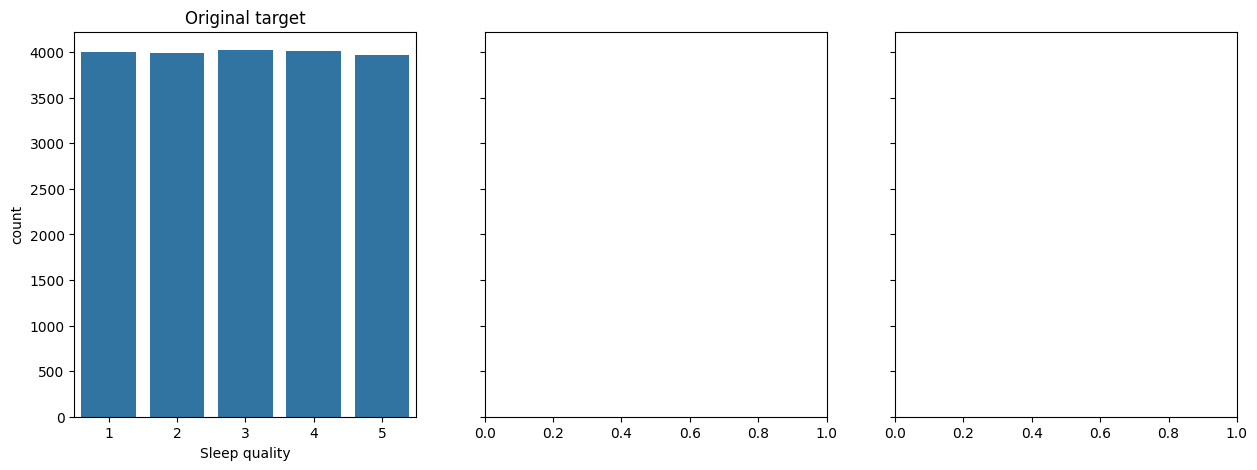

In [38]:
fig, axes = plt.subplots(1, 3, figsize= (15,5), sharey=True)

sns.countplot(x="Sleep quality", data=df, ax=axes[0])
axes[0].set_title("Original target")

sns.countplot(y_rus, ax=axes[1])
axes[1].set_title("Random Under Sampler")

sns.countplot(y_ros, ax=axes[2])
axes[2].set_title("Random Over Sampler")

## 6. Selección de Modelos Base

1. Implementar validación cruzada para varios modelos
2. Evaluar modelos básicos según el tipo de problema
3. Comparar resultados iniciales
4. Seleccionar los 3-5 mejores modelos
5. Documentar razones de selección

## 7. Optimización de Modelos Seleccionados

1. Realizar ajuste de hiperparámetros para cada modelo:
   - Grid Search
   - Random Search
   - Bayesian Optimization
2. Evaluar resultados de cada modelo optimizado
3. Considerar ensamble de mejores modelos
4. Seleccionar el modelo final

## 8. Evaluación y Análisis

1. Evaluar métricas finales en datos de test
2. Realizar análisis detallado de errores
3. Interpretar resultados:
   - Importancia de características
   - SHAP values
   - Partial dependence plots
4. Validar supuestos del modelo
5. Analizar casos específicos de error
6. Documentar hallazgos principales

## 9. Despliegue y Documentación

1. Preparar el modelo para producción:
   - Optimizar código
   - Crear pipeline de predicción
2. Documentar todo el proceso:
   - Decisiones tomadas
   - Resultados obtenidos
   - Limitaciones encontradas
3. Establecer plan de monitoreo:
   - Métricas a seguir
   - Frecuencia de actualización
   - Procedimientos de mantenimiento